original here: https://colab.research.google.com/github/arduino/ArduinoTensorFlowLiteTutorials/blob/master/GestureToEmoji/arduino_tinyml_workshop.ipynb


##Variables

In [ ]:
# URL = "https://raw.githubusercontent.com/Plastic-Scanner/data/main/data/20230913_DB2.3_first_dataset_lasercut/measurement.csv"
#URL = "https://raw.githubusercontent.com/Plastic-Scanner/data/main/data/20230919_DB2.3_third_dataset_lasercut/measurement.csv"
#URL = "/content/lasercut270901.csv"
URL = "/content/plastic_scanner_sheet - Sheet3 (14).csv"

TooBright = 1.8
TooDark = 0.2

##Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

##Preprocess

In [ ]:
df_raw = pd.read_csv(URL)
df = df_raw.loc[:, :'nm1720'] #drop all later columns
df

,Unnamed: 0,Unnamed: 1,PlasticType,Unnamed: 3,MeasurementType,Unnamed: 5,nm940,nm1050,nm1200,nm1300,nm1450,nm1550,nm1650,nm1720
0,NaN,NaN,nothing,NaN,calibration,NaN,607164,877344,1610301,1591175,1044554,1006165,374581,305097
1,NaN,NaN,pc,NaN,NaN,NaN,709592,1033132,1676733,1842100,1054154,1087432,311144,223741
2,NaN,NaN,pc,NaN,NaN,NaN,711813,1026383,1680000,1842111,1051905,1083445,313461,224921
3,NaN,NaN,pc,NaN,NaN,NaN,716149,1030677,1674641,1841546,1050252,1084003,312186,223011
4,NaN,NaN,pc,NaN,NaN,NaN,712406,1029647,1677211,1842243,1052472,1083728,311761,224119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,NaN,NaN,nothing,NaN,NaN,NaN,592983,860791,1581313,1571638,1030027,990363,367486,302172
68,NaN,NaN,nothing,NaN,NaN,NaN,592982,860739,1581296,1571673,1030038,990290,367426,302129
69,NaN,NaN,nothing,NaN,NaN,NaN,592896,860665,1581256,1571595,1029937,990142,367261,302000
70,NaN,NaN,nothing,NaN,NaN,NaN,592755,860526,1581103,1571477,1029843,990009,367215,301968


In [ ]:
#make a new dataframe with only the ones that have MeasurementType as "calibration" or PlasticType as "reference"
df_ref = df[(df['MeasurementType'] == 'calibration')]
df_ref

,Unnamed: 0,Unnamed: 1,PlasticType,Unnamed: 3,MeasurementType,Unnamed: 5,nm940,nm1050,nm1200,nm1300,nm1450,nm1550,nm1650,nm1720
0,NaN,NaN,nothing,NaN,calibration,NaN,607164,877344,1610301,1591175,1044554,1006165,374581,305097
61,NaN,NaN,nothing,NaN,calibration,NaN,597226,868438,1595190,1582494,1035361,995923,367465,301337
62,NaN,NaN,nothing,NaN,calibration,NaN,597226,868298,1595035,1582425,1035405,995870,367371,301267


In [ ]:
PLASTICTYPES = df['PlasticType'].unique()
print(PLASTICTYPES)

['nothing' 'pc' 'pet' 'pmma' 'other' 'ps']


In [ ]:
#plastics_to_train = ['pmma','ps','pc','pet']
#df['PlasticType'] = df['PlasticType'].apply(lambda x: x if x in plastics_to_train else 'other')

In [ ]:
PLASTICTYPES = df['PlasticType'].unique()
print(PLASTICTYPES)

['nothing' 'pc' 'pet' 'pmma' 'other' 'ps']


In [ ]:
#make a new dataframe called df_norm that devides the columns from 'nm940' to 'nm1720' of the original dataframe by the mean values of the columns from 'nm940' to 'nm1720' in the df2 dataframe
# while keeping the columns untill 'DateTime' from the original dataframe
df_norm = df
df_norm.loc[:, 'nm940':'nm1720'] = df.loc[:, 'nm940':'nm1720'].div((df_ref.loc[:, 'nm940':'nm1720'].mean()))
df_norm

,Unnamed: 0,Unnamed: 1,PlasticType,Unnamed: 3,MeasurementType,Unnamed: 5,nm940,nm1050,nm1200,nm1300,nm1450,nm1550,nm1650,nm1720
0,NaN,NaN,nothing,NaN,calibration,NaN,1.011032,1.006867,1.006328,1.003665,1.005888,1.006850,1.012913,1.008362
1,NaN,NaN,pc,NaN,NaN,NaN,1.181593,1.185655,1.047843,1.161941,1.015132,1.088173,0.841372,0.739476
2,NaN,NaN,pc,NaN,NaN,NaN,1.185291,1.177909,1.049885,1.161948,1.012967,1.084183,0.847637,0.743376
3,NaN,NaN,pc,NaN,NaN,NaN,1.192511,1.182837,1.046536,1.161591,1.011375,1.084741,0.844189,0.737063
4,NaN,NaN,pc,NaN,NaN,NaN,1.186278,1.181655,1.048142,1.162031,1.013513,1.084466,0.843040,0.740725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,NaN,NaN,nothing,NaN,NaN,NaN,0.987419,0.987871,0.988212,0.991342,0.991898,0.991038,0.993727,0.998695
68,NaN,NaN,nothing,NaN,NaN,NaN,0.987417,0.987811,0.988202,0.991364,0.991909,0.990965,0.993565,0.998552
69,NaN,NaN,nothing,NaN,NaN,NaN,0.987274,0.987726,0.988177,0.991315,0.991812,0.990816,0.993119,0.998126
70,NaN,NaN,nothing,NaN,NaN,NaN,0.987039,0.987567,0.988081,0.991240,0.991721,0.990683,0.992995,0.998020


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Group the data by "PlasticType" and calculate the mean and standard deviation of the specified columns
df_mean = df.groupby("PlasticType")[["nm940", "nm1050", "nm1200", "nm1300", "nm1450", "nm1550", "nm1650", "nm1720"]].mean()
df_std = df.groupby("PlasticType")[["nm940", "nm1050", "nm1200", "nm1300", "nm1450", "nm1550", "nm1650", "nm1720"]].std()

# Plot the average values for each plastic type with error bars
x = np.arange(len(df_mean.columns))
plt.figure(figsize=(12, 6))
for i, plastic_type in enumerate(df_mean.index):
    y = df_mean.loc[plastic_type].values
    error = df_std.loc[plastic_type].values
    plt.errorbar(x, y, yerr=error, label=plastic_type)

plt.xticks(x, df_mean.columns)
plt.xlabel("Wavelength")
plt.ylabel("Average Value")
plt.title("Average Values of Wavelength per Plastic Type with Error Bars")
plt.legend(loc="upper right")
plt.show()


In [ ]:
# go through the df_norm dataframe and delete all the rows that have a value that is smaller than "TooDark"value in the column "nm940" and bigger than "TooBright" value in the column "nm940"
df_norm = df_norm[(df_norm['nm940'] < TooBright) & (df_norm['nm940'] > TooDark)]
df_norm

,Unnamed: 0,Unnamed: 1,PlasticType,Unnamed: 3,MeasurementType,Unnamed: 5,nm940,nm1050,nm1200,nm1300,nm1450,nm1550,nm1650,nm1720
0,NaN,NaN,nothing,NaN,calibration,NaN,1.011032,1.006867,1.006328,1.003665,1.005888,1.006850,1.012913,1.008362
1,NaN,NaN,pc,NaN,NaN,NaN,1.181593,1.185655,1.047843,1.161941,1.015132,1.088173,0.841372,0.739476
2,NaN,NaN,pc,NaN,NaN,NaN,1.185291,1.177909,1.049885,1.161948,1.012967,1.084183,0.847637,0.743376
3,NaN,NaN,pc,NaN,NaN,NaN,1.192511,1.182837,1.046536,1.161591,1.011375,1.084741,0.844189,0.737063
4,NaN,NaN,pc,NaN,NaN,NaN,1.186278,1.181655,1.048142,1.162031,1.013513,1.084466,0.843040,0.740725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,NaN,NaN,nothing,NaN,NaN,NaN,0.987419,0.987871,0.988212,0.991342,0.991898,0.991038,0.993727,0.998695
68,NaN,NaN,nothing,NaN,NaN,NaN,0.987417,0.987811,0.988202,0.991364,0.991909,0.990965,0.993565,0.998552
69,NaN,NaN,nothing,NaN,NaN,NaN,0.987274,0.987726,0.988177,0.991315,0.991812,0.990816,0.993119,0.998126
70,NaN,NaN,nothing,NaN,NaN,NaN,0.987039,0.987567,0.988081,0.991240,0.991721,0.990683,0.992995,0.998020


In [ ]:
#make a new dataframe called df_snv that does and SNV transformation for each of the rows from 'nm940' to 'nm1720' of the df_norm dataframe
# while keeping the columns untill 'DateTime' from the original dataframe
df_snv = df_norm
df_snv.loc[:, 'nm940':'nm1720'] = df_norm.loc[:, 'nm940':'nm1720'].sub(df_norm.loc[:, 'nm940':'nm1720'].mean(axis=1), axis=0).div(df_norm.loc[:, 'nm940':'nm1720'].std(axis=1), axis=0)
#df_snv

In [ ]:
df_snv = df_snv[df_snv['MeasurementType'] != 'calibration']


In [ ]:
df_snv

,Unnamed: 0,Unnamed: 1,PlasticType,Unnamed: 3,MeasurementType,Unnamed: 5,nm940,nm1050,nm1200,nm1300,nm1450,nm1550,nm1650,nm1720
1,NaN,NaN,pc,NaN,NaN,NaN,0.907723,0.932479,0.092606,0.787958,-0.106747,0.338388,-1.165708,-1.786698
2,NaN,NaN,pc,NaN,NaN,NaN,0.944142,0.898409,0.105234,0.799520,-0.123494,0.317727,-1.147794,-1.793745
3,NaN,NaN,pc,NaN,NaN,NaN,0.968082,0.909516,0.084336,0.780892,-0.128533,0.315635,-1.140688,-1.789239
4,NaN,NaN,pc,NaN,NaN,NaN,0.940954,0.912669,0.095815,0.792606,-0.116054,0.318051,-1.159031,-1.785010
5,NaN,NaN,pc,NaN,NaN,NaN,0.962900,0.867331,0.132865,0.789298,-0.132045,0.331578,-1.163229,-1.788696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,NaN,NaN,nothing,NaN,NaN,NaN,-1.034135,-0.912888,-0.821276,0.017834,0.167135,-0.063701,0.657551,1.989478
68,NaN,NaN,nothing,NaN,NaN,NaN,-1.033078,-0.926096,-0.820051,0.038182,0.186190,-0.070168,0.635682,1.989339
69,NaN,NaN,nothing,NaN,NaN,NaN,-1.060078,-0.932922,-0.806273,0.075603,0.215353,-0.064386,0.582727,1.989976
70,NaN,NaN,nothing,NaN,NaN,NaN,-1.082594,-0.935331,-0.791743,0.089813,0.224086,-0.065557,0.579412,1.981916


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load your dataset here (replace 'your_dataset.csv' with your actual dataset file)
data = df_snv

# Assuming 'material_type' is the column that indicates the material type
X = data.drop(df.columns[0:6], axis=1)
y = data['PlasticType']

# Initialize SMOTE with the desired number of samples for each class (e.g., 100)
desired_samples = 18
smote = SMOTE(sampling_strategy={material_type: desired_samples for material_type in y.unique()})

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:", Counter(y_resampled))

# Now you can use X_resampled and y_resampled as your balanced dataset

# Create a new DataFrame with the resampled data
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['PlasticType'] = y_resampled

# Save the resampled data to a CSV file
resampled_data.to_csv('test_resampled.csv', index=False)


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (18) in class pc will be larger than the number of samples in the majority class (class #other -> 12)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (18) in class pet will be larger than the number of samples in the majority class (class #other -> 12)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (18) in class pmma will be larger than the number of samples in the majority class (class #other -> 12)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (18) in class other will be larger than the number of samples in the majority class (class #other -> 12)
  warnings.

Class distribution after SMOTE: Counter({'pc': 18, 'pet': 18, 'pmma': 18, 'other': 18, 'ps': 18, 'nothing': 18})


In [ ]:
df_snv = resampled_data

In [ ]:
#URL = "/content/plastic_scanner_sheet - Sheet3 (4).csv"

In [ ]:
#df_snv = pd.read_csv(URL)

In [ ]:
df_snv

,nm940,nm1050,nm1200,nm1300,nm1450,nm1550,nm1650,nm1720,PlasticType
0,0.907723,0.932479,0.092606,0.787958,-0.106747,0.338388,-1.165708,-1.786698,pc
1,0.944142,0.898409,0.105234,0.799520,-0.123494,0.317727,-1.147794,-1.793745,pc
2,0.968082,0.909516,0.084336,0.780892,-0.128533,0.315635,-1.140688,-1.789239,pc
3,0.940954,0.912669,0.095815,0.792606,-0.116054,0.318051,-1.159031,-1.785010,pc
4,0.962900,0.867331,0.132865,0.789298,-0.132045,0.331578,-1.163229,-1.788696,pc
...,...,...,...,...,...,...,...,...,...
103,1.070561,1.169053,-0.169906,0.712103,-0.148335,0.116466,-1.121568,-1.628375,ps
104,0.650867,0.710763,0.139372,0.767756,0.185663,0.576846,-1.018682,-2.012585,ps
105,1.021236,1.116248,-0.158133,0.721808,-0.104855,0.208567,-1.123482,-1.681390,ps
106,0.824092,0.763757,0.072023,0.688196,0.124738,0.522841,-1.010732,-1.984914,ps


In [ ]:
print(df_snv["PlasticType"])

0      pc
1      pc
2      pc
3      pc
4      pc
       ..
103    ps
104    ps
105    ps
106    ps
107    ps
Name: PlasticType, Length: 108, dtype: object


##Train neural network

In [ ]:
print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
PLASTICTYPES = df_snv['PlasticType'].unique()
NUM_PLASTICTYPES = len(df_snv['PlasticType'].unique())
print(PLASTICTYPES)

# Create empty NumPy arrays
outputs = []
inputs = []

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_PLASTICS = np.eye(NUM_PLASTICTYPES)
# Iterate over the DataFrame
for row in df_snv.itertuples():
    #Add the value in the 'PlasticType' column to the outputs array
    #outputs = ONE_HOT_ENCODED_GESTURES[]
    for i in range(NUM_PLASTICTYPES):
      #if PLASTICTYPES[i] == row[3]:
      if PLASTICTYPES[i] == row[9]:
        output = ONE_HOT_ENCODED_PLASTICS[i]
    outputs.append(output)
    # Create an array of the values from the column 'nm940' till 'nm1720'
    #input_array = row[7:15]
    input_array = row[1:9]
    # Add the array to the input array
    inputs.append(input_array)

print('outputs:', len(outputs))
print('inputs:', len(inputs))
inputs = np.array(inputs)
outputs = np.array(outputs)
print("Data set parsing and preparation complete.")

TensorFlow version = 2.15.0

['pc' 'pet' 'pmma' 'other' 'ps' 'nothing']
outputs: 108
inputs: 108
Data set parsing and preparation complete.


In [ ]:
print(outputs)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1.

In [ ]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
# https://stackoverflow.com/a/37710486/2020087
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

# Swap the consecutive indexes (0, 1, 2, etc) with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]

# Split the recordings (group of samples) into three sets: training, testing and validation
TRAIN_SPLIT = int(0.8 * num_inputs)
TEST_SPLIT = int(0.15 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")

Data set randomization and splitting complete.


In [ ]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(64, activation='relu')) # relu is used for performance
#model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_PLASTICTYPES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=100, batch_size=1, validation_data=(inputs_validate, outputs_validate))

Epoch 1/100
86/86 [==============================] - 1s 8ms/step - loss: 0.1285 - mae: 0.2642 - val_loss: 0.1341 - val_mae: 0.2717
Epoch 2/100
86/86 [==============================] - 0s 3ms/step - loss: 0.1069 - mae: 0.2344 - val_loss: 0.1273 - val_mae: 0.2633
Epoch 3/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0936 - mae: 0.2105 - val_loss: 0.1162 - val_mae: 0.2496
Epoch 4/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0824 - mae: 0.1903 - val_loss: 0.1023 - val_mae: 0.2305
Epoch 5/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0749 - mae: 0.1750 - val_loss: 0.0928 - val_mae: 0.2159
Epoch 6/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0684 - mae: 0.1619 - val_loss: 0.0920 - val_mae: 0.2096
Epoch 7/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0632 - mae: 0.1497 - val_loss: 0.0822 - val_mae: 0.1926
Epoch 8/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0598 - m

## Verify

Graph the models performance vs validation.


### Graph the loss

Graph the loss to see when the model stops improving.

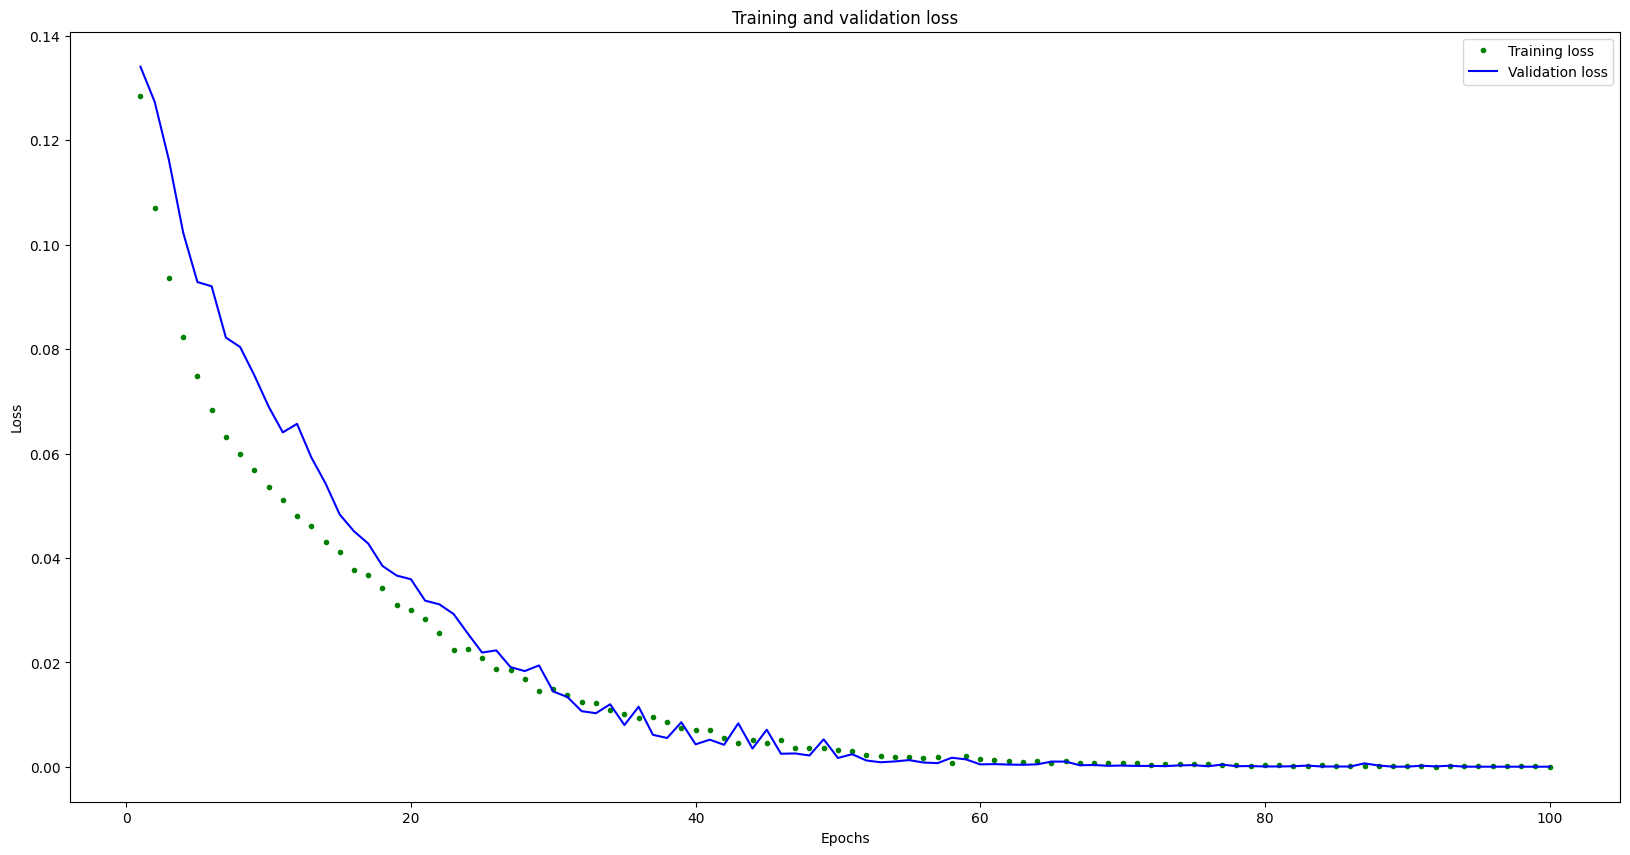

[20.0, 10.0]


In [ ]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

### Graph the loss again, skipping a bit of the start

We'll graph the same data as the previous code cell, but start at index 100 so we can further zoom in once the model starts to converge.

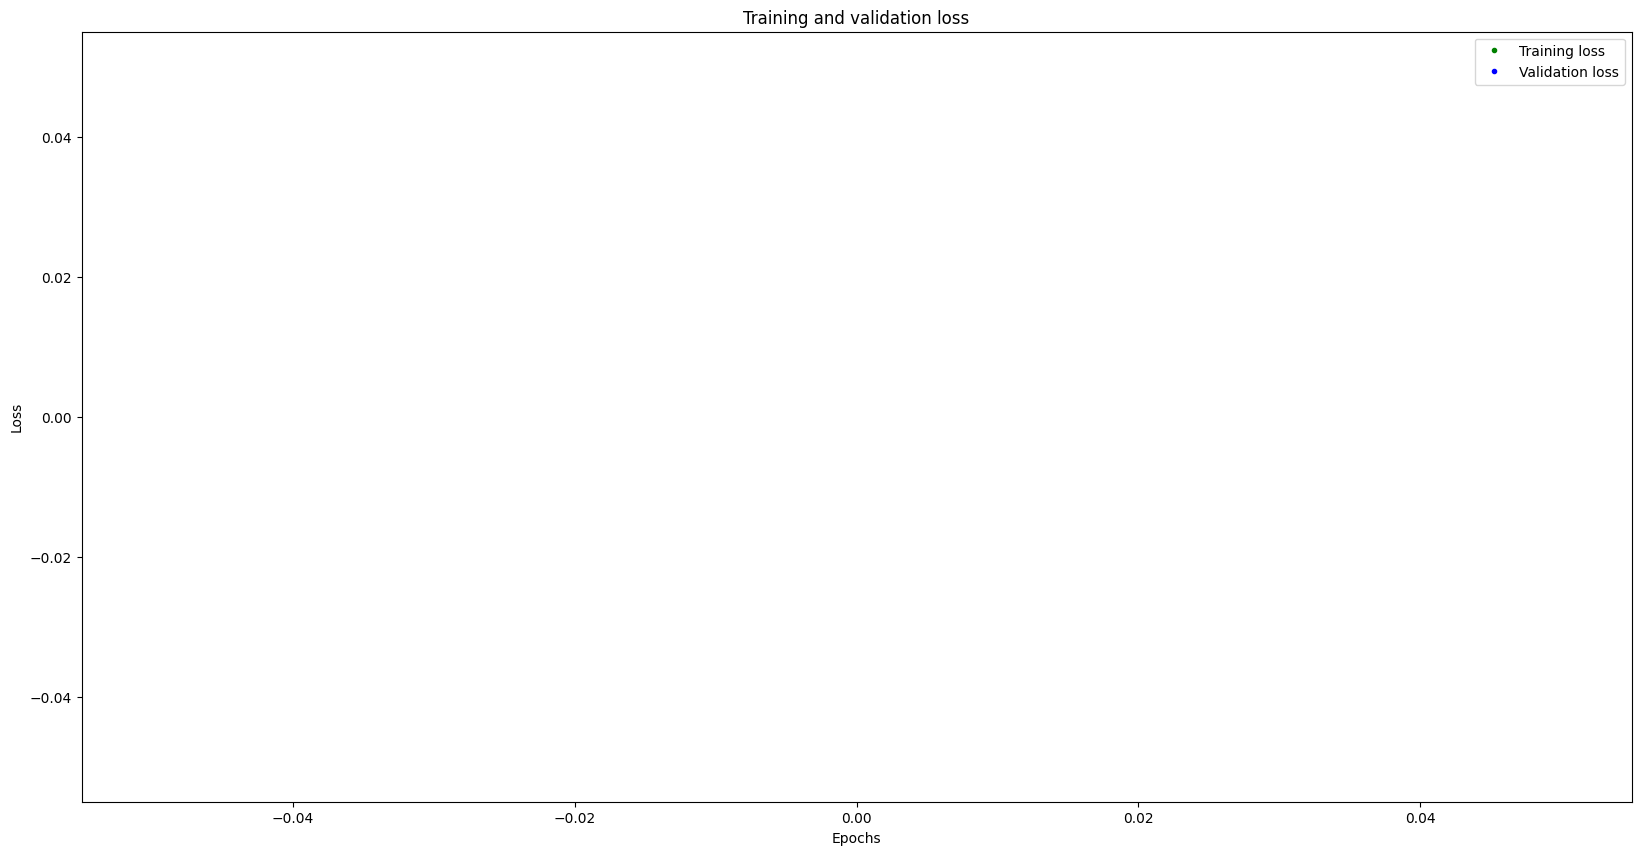

In [ ]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Graph the mean absolute error

[Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) is another metric to judge the performance of the model.



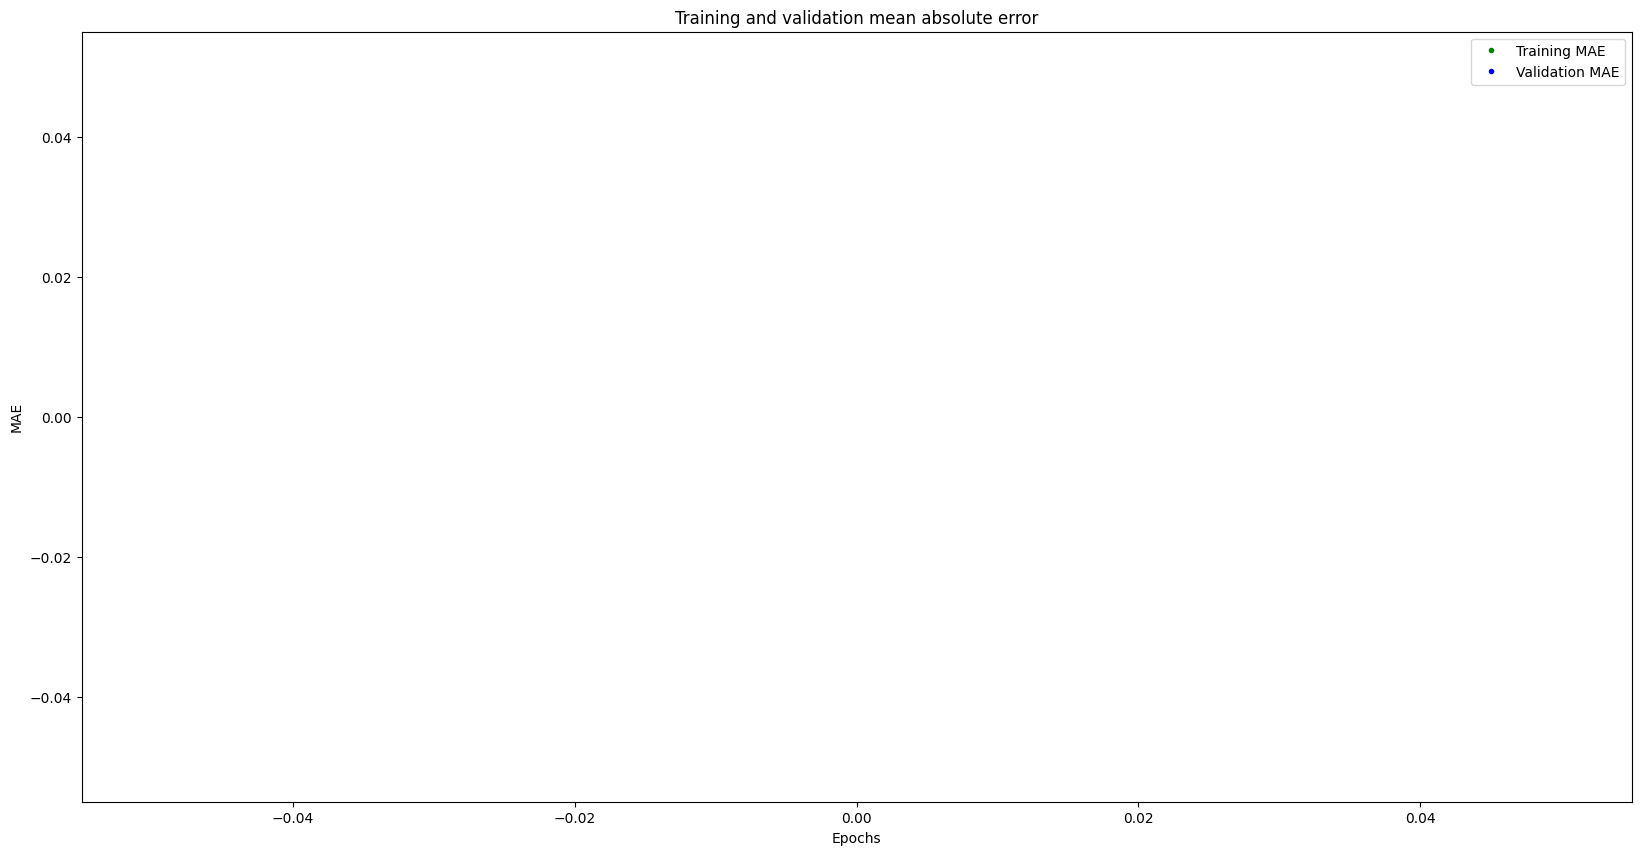

In [ ]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


### Run with Test Data
Put our test data into the model and plot the predictions


In [ ]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# # Plot the predictions along with to the test data
# plt.clf()
# plt.title('Training data predicted vs actual values')
# #plt.plot(inputs_test, outputs_test, 'b.', label='Actual')
# plt.plot(inputs_test, predictions, 'r.', label='Predicted')
# plt.show()

1/1 [==============================] - 0s 172ms/step
predictions =
 [[0.    0.    0.    0.002 0.    0.998]
 [0.    0.994 0.004 0.001 0.    0.   ]
 [0.    0.994 0.006 0.    0.    0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.962 0.034 0.    0.001 0.003 0.   ]
 [0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.006 0.993 0.001 0.    0.   ]
 [0.002 0.    0.    0.    0.998 0.   ]
 [0.992 0.005 0.    0.    0.003 0.   ]
 [0.844 0.    0.    0.    0.156 0.   ]
 [0.    0.    0.    0.002 0.    0.998]
 [0.99  0.002 0.    0.    0.008 0.   ]
 [0.    0.    0.001 0.999 0.    0.   ]
 [0.    0.996 0.    0.004 0.    0.   ]
 [0.001 0.    0.    0.    0.999 0.   ]]
actual =
 [[0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0

## Test with new data

In [ ]:
test_measure = [22977,	36106,	52788,	71216,	27235,	35036,	10490,	6381]
test_calibrate = [26016,	46824,	82300,	80176,	42096,	53390,	19076,	13274]

#normalize
normalized = [0,0,0,0,0,0,0,0]
for i in range(len(test_measure)):
  normalized[i-1] = test_measure[i-1]/test_calibrate[i-1]

#check quality
if normalized[0] > TooBright:
  print("sample too bright")
elif normalized[0] < TooDark:
  print("sampe too dark")

#snv transform
new_list = []
mean = np.mean(normalized)
std = np.std(normalized)
for value in normalized:
  new_value = (value - mean) / std
  new_list.append(new_value)

#predict
predictions = model.predict([new_list])
print("predictions =\n", np.round(predictions, decimals=3))

1/1 [==============================] - 0s 34ms/step
predictions =
 [[0.    0.    0.017 0.982 0.001 0.   ]]


In [ ]:
print(outputs)

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0.

# Convert the Trained Model to Tensor Flow Lite

The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.

In [ ]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)



Model is 13252 bytes


## Encode the Model in an Arduino Header File

The next cell creates a constant byte array that contains the TFlite model. Import it as a tab with the sketch below.

In [ ]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 81,756 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


In [ ]:
#https://github.com/arduino/ArduinoTensorFlowLiteTutorials/blob/master/GestureToEmoji/ArduinoSketches/IMU_Classifier/IMU_Classifier.ino